### imports and data upload

##### Basic datacleaning

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stats = pd.read_csv("hf://datasets/andrewkroening/538-NBA-Historical-Raptor/538_historical_RAPTOR_by_player.csv")
stats

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128
18549,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
18550,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
18551,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
core_features = ['raptor_total', 'war_total', 'predator_total', 'pace_impact']
stats = stats.dropna(subset=core_features)
stats

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128
18549,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
18550,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
18551,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164


In [3]:
stats['player_season'] = stats['player_name'] + "_" + stats['season'].astype(str)
stats.reset_index(drop=True)

/var/folders/x1/1vc0lb715f1bhmqdh6whmvjm0000gn/T/ipykernel_62498/1264655517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['player_season'] = stats['player_name'] + "_" + stats['season'].astype(str)


,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241,Alaa Abdelnaby_1991
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436,Alaa Abdelnaby_1992
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266,Alaa Abdelnaby_1993
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152,Alaa Abdelnaby_1994
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922,Alaa Abdelnaby_1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18547,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128,Ivica Zubac_2017
18548,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576,Ivica Zubac_2018
18549,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074,Ivica Zubac_2019
18550,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164,Ivica Zubac_2020


In [4]:
stats

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241,Alaa Abdelnaby_1991
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436,Alaa Abdelnaby_1992
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266,Alaa Abdelnaby_1993
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152,Alaa Abdelnaby_1994
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922,Alaa Abdelnaby_1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128,Ivica Zubac_2017
18549,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576,Ivica Zubac_2018
18550,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074,Ivica Zubac_2019
18551,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164,Ivica Zubac_2020


#### just taking a look at some of the great's stats :)

In [5]:
mj = stats[stats['player_name'] == 'Michael Jordan']
mj

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
9008,Michael Jordan,jordami01,1985,6936,3315,5.948410,1.565631,7.514041,17.400870,16.410001,0.990870,6.067739,2.027862,8.095602,0.057656,Michael Jordan_1985
9009,Michael Jordan,jordami01,1986,1226,586,4.239116,1.935441,6.174556,2.699527,2.003616,0.695911,4.833867,1.831301,6.665167,0.357132,Michael Jordan_1986
9010,Michael Jordan,jordami01,1987,6866,3409,5.542254,2.847638,8.389893,19.376113,18.655471,0.720642,5.868343,2.948787,8.817129,-0.101663,Michael Jordan_1987
9011,Michael Jordan,jordami01,1988,7498,3738,7.511207,3.677306,11.188513,26.635611,24.355978,2.279633,7.562028,3.953092,11.515120,0.027273,Michael Jordan_1988
9012,Michael Jordan,jordami01,1989,8031,3973,8.297340,2.711836,11.009176,28.015043,23.079246,4.935797,8.195573,2.930561,11.126134,-0.035218,Michael Jordan_1989
9013,Michael Jordan,jordami01,1990,7832,3871,8.620220,2.217517,10.837736,27.029465,21.754145,5.275320,8.852853,2.488101,11.340954,0.054635,Michael Jordan_1990
9014,Michael Jordan,jordami01,1991,7391,3723,9.129036,3.162250,12.291286,28.762877,22.748826,6.014052,9.346199,3.364473,12.710672,-0.109311,Michael Jordan_1991
9015,Michael Jordan,jordami01,1992,7896,4022,6.959557,2.689842,9.649398,25.531369,20.155628,5.375741,7.231270,2.835295,10.066566,-0.159069,Michael Jordan_1992
9016,Michael Jordan,jordami01,1993,7438,3850,7.627619,2.779669,10.407288,26.012846,20.290984,5.721862,8.097739,2.932638,11.030377,-0.068663,Michael Jordan_1993
9017,Michael Jordan,jordami01,1995,2069,1088,2.658481,2.061245,4.719726,4.207210,2.211007,1.996204,3.066904,2.247167,5.314071,-0.409595,Michael Jordan_1995


In [6]:
lj = stats[stats['player_name'] == 'LeBron James']
lj

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
8240,LeBron James,jamesle01,2004,5974,3122,1.337110,-0.298264,1.038846,6.013995,6.013995,0.000000,1.629358,-0.105367,1.523991,-0.318001,LeBron James_2004
8241,LeBron James,jamesle01,2005,6404,3388,5.094678,1.423964,6.518643,15.950430,15.950430,0.000000,5.324233,1.480191,6.804425,-0.407580,LeBron James_2005
8242,LeBron James,jamesle01,2006,7452,3965,6.415884,0.840638,7.256522,20.235414,18.053916,2.181498,6.492076,0.916880,7.408956,-0.123553,LeBron James_2006
8243,LeBron James,jamesle01,2007,7717,4083,4.632207,2.641378,7.273585,21.018177,15.996849,5.021328,4.681354,2.435116,7.116470,-0.138091,LeBron James_2007
8244,LeBron James,jamesle01,2008,6753,3579,6.802467,1.626495,8.428962,20.492724,17.526774,2.965951,6.839819,1.654394,8.494213,0.015237,LeBron James_2008
8245,LeBron James,jamesle01,2009,6760,3634,9.334994,3.245821,12.580815,28.525259,22.795057,5.730203,9.408782,2.868374,12.277156,-0.344556,LeBron James_2009
8246,LeBron James,jamesle01,2010,6611,3426,9.196731,2.250084,11.446815,24.812816,21.805025,3.007791,9.158159,1.967559,11.125718,-0.376951,LeBron James_2010
8247,LeBron James,jamesle01,2011,7544,3985,6.041356,1.546103,7.587459,21.087008,16.496675,4.590334,6.311466,1.520263,7.831728,-0.219552,LeBron James_2011
8248,LeBron James,jamesle01,2012,6293,3309,7.897846,2.090395,9.988241,21.649447,14.642513,7.006934,7.896981,1.868152,9.765133,-0.364794,LeBron James_2012
8249,LeBron James,jamesle01,2013,7265,3837,8.529733,1.092302,9.622035,24.219562,18.432110,5.787452,8.668273,1.078148,9.746421,-0.614578,LeBron James_2013


In [7]:
sc = stats[stats['player_name'] == 'Stephen Curry']
sc

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
3819,Stephen Curry,curryst01,2010,6127,2896,1.660506,-0.237263,1.423242,6.170613,6.170613,0.000000,1.851163,0.258905,2.110068,0.068253,Stephen Curry_2010
3820,Stephen Curry,curryst01,2011,4972,2489,3.255244,-0.340517,2.914727,7.197756,7.197756,0.000000,3.231819,-0.013222,3.218597,0.054262,Stephen Curry_2011
3821,Stephen Curry,curryst01,2012,1424,732,3.979718,0.996676,4.976394,2.891080,2.891080,0.000000,4.172123,1.101405,5.273528,0.177035,Stephen Curry_2012
3822,Stephen Curry,curryst01,2013,6924,3480,5.322088,-0.039084,5.283004,14.308275,11.951577,2.356698,5.595119,0.612573,6.207691,-0.181556,Stephen Curry_2013
3823,Stephen Curry,curryst01,2014,6419,3142,7.758269,0.522740,8.281008,18.142943,16.093224,2.049718,7.759047,1.062669,8.821716,2.177092,Stephen Curry_2014
3824,Stephen Curry,curryst01,2015,7192,3439,8.600890,2.437371,11.038262,25.089873,19.914785,5.175088,8.787715,2.657047,11.444762,3.130309,Stephen Curry_2015
3825,Stephen Curry,curryst01,2016,7053,3314,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111,Stephen Curry_2016
3826,Stephen Curry,curryst01,2017,6963,3239,9.308684,-0.095877,9.212807,20.653304,15.619612,5.033692,9.791555,0.593993,10.385548,3.581550,Stephen Curry_2017
3827,Stephen Curry,curryst01,2018,4708,2186,8.057850,-0.500107,7.557743,11.847307,8.773362,3.073945,8.209618,0.385209,8.594826,2.223310,Stephen Curry_2018
3828,Stephen Curry,curryst01,2019,6820,3177,7.509478,0.277038,7.786516,17.566129,13.263794,4.302335,8.072135,0.634773,8.706908,2.223997,Stephen Curry_2019


In [8]:
print("MJ Raptor TOTAL:", mj.raptor_total.mean())
print("MJ War TOTAL:", mj.war_total.mean())
print("MJ Predator TOTAL:", mj.predator_total.mean())
print(mj.pace_impact.mean())


MJ Raptor TOTAL: 7.857287125466668
MJ War TOTAL: 18.690811792799998
MJ Predator TOTAL: 8.294726048333333
-0.16003982099999997


In [9]:
print("LJ Raptor TOTAL:", lj.raptor_total.mean())
print("LJ War TOTAL:", lj.war_total.mean())
print("LJ Predator TOTAL:", lj.predator_total.mean())
print(lj.pace_impact.mean())

LJ Raptor TOTAL: 7.4216497012022415
LJ War TOTAL: 17.906421408313534
LJ Predator TOTAL: 7.338675603253855
-0.03433661468494371


In [10]:
print("SC Raptor TOTAL:", sc.raptor_total.mean())
print("SC War TOTAL:", sc.war_total.mean())
print("SC Predator TOTAL:", sc.predator_total.mean())
print(sc.pace_impact.mean())

SC Raptor TOTAL: 6.892266083433927
SC War TOTAL: 13.487677584037598
SC Predator TOTAL: 7.379579967281959
1.7990044633603333


#### Simple Data Analysis

In [11]:
stats.dtypes

player_name          object
player_id            object
season                int64
poss                  int64
mp                    int64
raptor_offense      float64
raptor_defense      float64
raptor_total        float64
war_total           float64
war_reg_season      float64
war_playoffs        float64
predator_offense    float64
predator_defense    float64
predator_total      float64
pace_impact         float64
player_season        object
dtype: object

In [12]:
stats.raptor_total.describe()

count    18552.000000
mean        -1.597874
std          4.407006
min       -103.084801
25%         -3.568258
50%         -1.366652
75%          0.738991
max         72.622361
Name: raptor_total, dtype: float64

In [13]:
stats[stats['raptor_total'] < -100]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
11914,Gheorghe Muresan,muresgh01,1999,2,1,-82.192072,-20.892729,-103.084801,-0.053045,-0.053045,0.0,-71.510086,-29.932564,-101.44265,3.259603,Gheorghe Muresan_1999


##### I have never heard of this player but he's a romanian basketball player and was only able to play for one season after running into back injuries

In [14]:
stats[stats['raptor_total'] > 72]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
11588,Naz Mitrou-Long,mitrona01,2018,3,1,53.033254,19.589106,72.622361,0.040787,0.040787,0.0,40.169967,8.936199,49.106166,6.014441,Naz Mitrou-Long_2018


##### I have never heard of this player either but turns out he left the NBA to play for greek basketball team 

In [15]:
stats.war_total.describe()

count    18552.000000
mean         1.995081
std          3.475759
min         -7.382978
25%         -0.115875
50%          0.594647
75%          3.125185
max         28.762877
Name: war_total, dtype: float64

##### yeah saw that one coming ofc the playeres that contributed to the most number of wins over a full season compared to a replacement-level player includes MJ and LeBron

In [16]:
stats[stats['war_total'] > 28]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
8245,LeBron James,jamesle01,2009,6760,3634,9.334994,3.245821,12.580815,28.525259,22.795057,5.730203,9.408782,2.868374,12.277156,-0.344556,LeBron James_2009
9012,Michael Jordan,jordami01,1989,8031,3973,8.297340,2.711836,11.009176,28.015043,23.079246,4.935797,8.195573,2.930561,11.126134,-0.035218,Michael Jordan_1989
9014,Michael Jordan,jordami01,1991,7391,3723,9.129036,3.162250,12.291286,28.762877,22.748826,6.014052,9.346199,3.364473,12.710672,-0.109311,Michael Jordan_1991


In [17]:
stats.predator_total.describe()

count    18552.000000
mean        -1.798398
std          4.348284
min       -101.442650
25%         -3.981763
50%         -1.623764
75%          0.687687
max         49.106166
Name: predator_total, dtype: float64

In [18]:
stats[stats['predator_total'] > 49]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
11588,Naz Mitrou-Long,mitrona01,2018,3,1,53.033254,19.589106,72.622361,0.040787,0.040787,0.0,40.169967,8.936199,49.106166,6.014441,Naz Mitrou-Long_2018


In [19]:
stats[stats['predator_total'] < -101]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
11914,Gheorghe Muresan,muresgh01,1999,2,1,-82.192072,-20.892729,-103.084801,-0.053045,-0.053045,0.0,-71.510086,-29.932564,-101.44265,3.259603,Gheorghe Muresan_1999


##### Both of these results just match the raptor_total results

In [20]:
stats.pace_impact.describe()

count    18552.000000
mean         0.199551
std          0.804467
min         -6.892146
25%         -0.236273
50%          0.096562
75%          0.518319
max         23.732063
Name: pace_impact, dtype: float64

In [21]:
stats[stats['pace_impact'] > 23]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
12219,Chuck Nevitt,nevitch01,1994,2,1,-4.390342,-19.496001,-23.886342,-0.013443,-0.013443,0.0,4.206255,-15.749438,-11.543183,23.732063,Chuck Nevitt_1994


In [22]:
stats[stats['pace_impact'] < -6]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,player_season
944,Steve Bardo,bardost01,1992,2,1,23.143178,-3.868893,19.274285,0.010470,0.010470,0.0,20.285423,-5.680503,14.604920,-6.672336,Steve Bardo_1992
7471,Steven Hill,hillst01,2009,4,2,33.082161,-0.398375,32.683786,0.033471,0.033471,0.0,29.766725,-2.598152,27.168573,-6.892146,Steven Hill_2009
7568,John Holland,hollajo02,2019,2,1,-15.746631,15.992448,0.245816,0.001434,0.001434,0.0,-10.634510,5.053319,-5.581191,-6.319818,John Holland_2019


#### Important Features: raptor_total, war_total, predator_total, and pace_impact

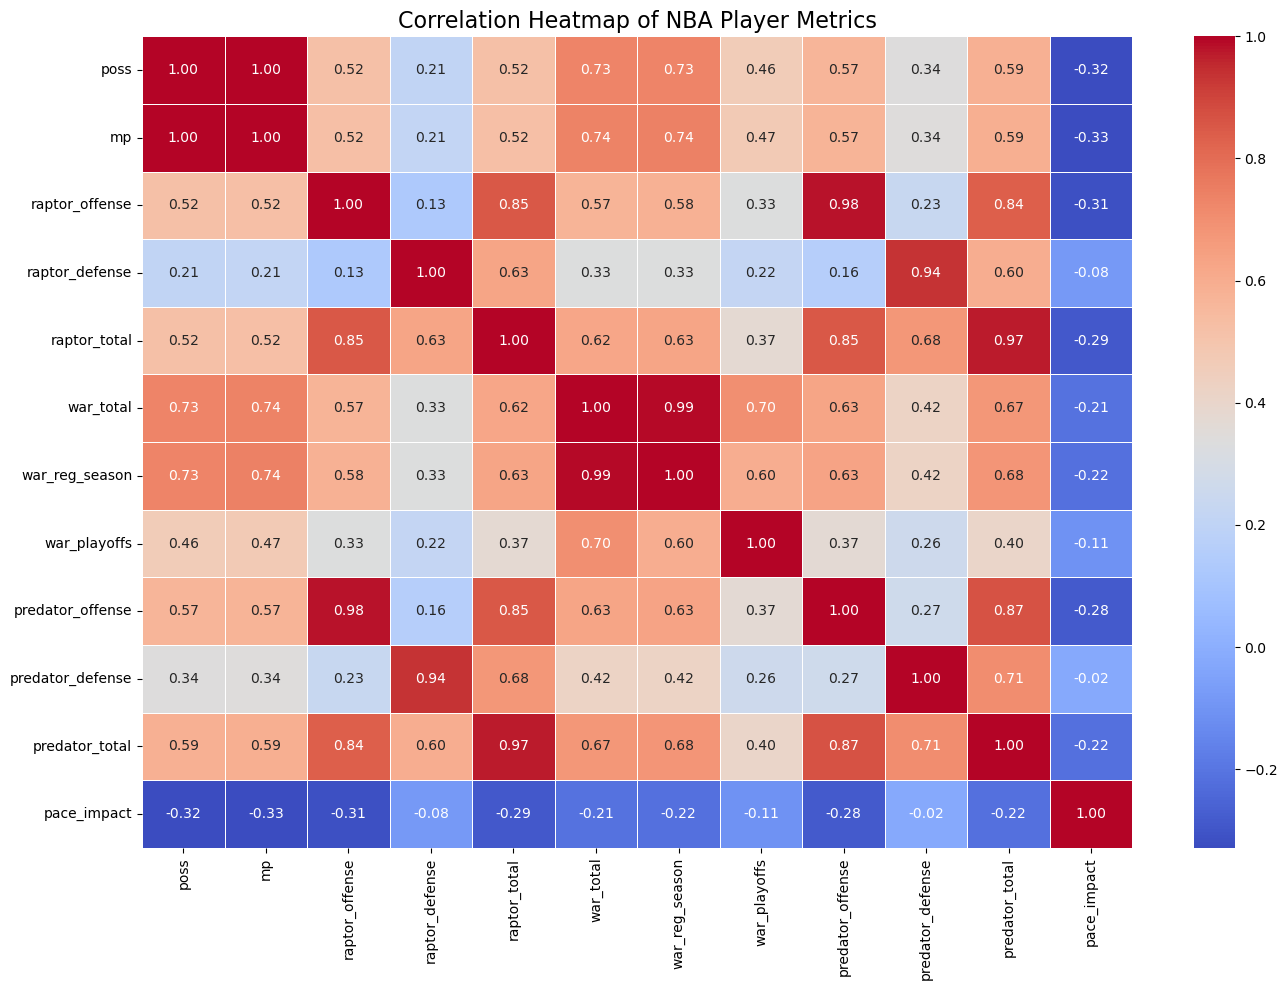

In [23]:
# just take numerical featres
features_for_corr = [
    'poss', 'mp',
    'raptor_offense', 'raptor_defense', 'raptor_total',
    'war_total', 'war_reg_season', 'war_playoffs',
    'predator_offense', 'predator_defense', 'predator_total',
    'pace_impact'
]

df_corr = stats[features_for_corr].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of NBA Player Metrics", fontsize=16)
plt.tight_layout()
plt.show()


##### It is good to see that there is a correlation between various raptor, predator, and war features

In [24]:
p1 = input("Enter player 1: ")

In [25]:
p2 = input("Enter player 2: ")

In [26]:
p1_war = stats[stats['player_name'] == p1].war_total.mean()
p1_raptor = stats[stats['player_name'] == p1].raptor_total.mean()
p1_predator = stats[stats['player_name'] == p1].predator_total.mean()

In [27]:
p2_war = stats[stats['player_name'] == p2].war_total.mean()
p2_raptor = stats[stats['player_name'] == p2].raptor_total.mean()
p2_predator = stats[stats['player_name'] == p2].predator_total.mean()

#### Baseline 

In [28]:
w1 = (.6 * p1_raptor) + (.3 * p1_war) + (.1 * p1_predator)
w2 =  (.6 * p2_raptor) + (.3 * p2_war) + (.1 * p2_predator)
print(w1-w2)


# if w1-w2 > 0 then w1 is better
# if w1-w2 < 0 then w2 is better

-1.63916288154096


In [29]:
p1,p2

('Stephen Curry', 'LeBron James')

##### Group by so each player has one row

In [79]:
player_avg_stats = stats.groupby('player_name', as_index=False)[
    ['war_total', 'raptor_total', 'predator_total']
].mean()

player_avg_stats

,player_name,war_total,raptor_total,predator_total
0,A.C. Green,3.759939,-0.085252,-0.339975
1,A.J. Bramlett,-0.221281,-9.820485,-8.993465
2,A.J. English,-1.298910,-4.389665,-4.958862
3,A.J. Guyton,-0.077551,-5.574582,-6.324631
4,A.J. Wynder,-0.111936,-8.407881,-9.998992
...,...,...,...,...
3436,Zion Williamson,3.715461,2.203405,1.021216
3437,Zoran Dragic,-0.345806,-11.698834,-10.590995
3438,Zoran Planinic,-0.002409,-2.716032,-3.175406
3439,Zydrunas Ilgauskas,2.937418,-0.153530,-0.061967


In [85]:
print(player_avg_stats.war_total.max())
print(player_avg_stats.raptor_total.max())
print(player_avg_stats.predator_total.max())

18.690811792799998
37.77692424
36.56396944


In [84]:
player_avg_stats[player_avg_stats['player_name'] == 'Michael Jordan']

,player_name,war_total,raptor_total,predator_total
2306,Michael Jordan,18.690812,7.857287,8.294726


##### Looking at some of the top players

In [95]:
player_avg_stats[player_avg_stats['war_total'] > 13]

,player_name,war_total,raptor_total,predator_total
554,Chris Paul,14.814094,7.955715,8.494011
784,David Robinson,13.877636,6.877400,6.580195
1434,James Harden,14.351056,6.516834,6.973161
1702,John Stockton,15.925370,7.850924,7.896991
2009,Larry Bird,14.777383,5.810931,6.153630
2042,LeBron James,17.906421,7.421650,7.338676
2126,Magic Johnson,16.650029,7.375182,7.389031
2306,Michael Jordan,18.690812,7.857287,8.294726
2475,Nikola Jokic,13.064720,7.335337,7.884316
3014,Stephen Curry,13.487678,6.892266,7.379580


#### Testing logistic regression

In [82]:
import pandas as pd
import numpy as np


player_avg_stats = player_avg_stats.dropna(subset=["war_total", "raptor_total", "predator_total"])

# Sample random matchups
num_pairs = 1000000  
matchups = []

for _ in range(num_pairs):
    p1, p2 = player_avg_stats.sample(n=2, replace=False).itertuples(index=False)

    diff_war = p1.war_total - p2.war_total
    diff_raptor = p1.raptor_total - p2.raptor_total
    diff_pred = p1.predator_total - p2.predator_total

    total_diff = diff_war + diff_raptor + diff_pred

    matchups.append({
        'war_diff': diff_war,
        'raptor_diff': diff_raptor,
        'predator_diff': diff_pred,
        'label': 1 if total_diff > 0 else 0
    })

matchup_df = pd.DataFrame(matchups)
print(matchup_df.head())

   war_diff  raptor_diff  predator_diff  label
0  0.957277     1.935676       1.418507      1
1 -2.482039    -6.070980      -6.713381      0
2  0.687468     8.619568       9.260156      1
3 -4.365657    -0.343444      -1.531472      0
4 -2.206868    -0.323634      -0.721191      0


In [103]:
matchup_df

,war_diff,raptor_diff,predator_diff,label
0,0.957277,1.935676,1.418507,1
1,-2.482039,-6.070980,-6.713381,0
2,0.687468,8.619568,9.260156,1
3,-4.365657,-0.343444,-1.531472,0
4,-2.206868,-0.323634,-0.721191,0
...,...,...,...,...
999995,0.633324,-5.706735,-4.238549,0
999996,-0.240509,3.992808,4.491407,1
999997,4.171997,3.386879,4.434571,1
999998,-0.112341,-2.045587,-2.464911,0


In [104]:
X = matchup_df[['war_diff', 'raptor_diff', 'predator_diff']]
y = matchup_df['label']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {round(acc * 100, 2)}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importances (coefficients)
print("\nModel Coefficients:")
for feat, coef in zip(X.columns, logreg.coef_[0]):
    print(f"{feat}: {round(coef, 4)}")


Logistic Regression Accuracy: 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100013
           1       1.00      1.00      1.00     99987

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Confusion Matrix:
[[100012      1]
 [     8  99979]]

Model Coefficients:
war_diff: 24.5219
raptor_diff: 24.5743
predator_diff: 24.5901


In [105]:
import joblib

# Save the model to use in your backend later
joblib.dump(logreg, "logistic_player_matchup_model.pkl")

['logistic_player_matchup_model.pkl']

In [114]:
def predict_head_to_head(player1, player2, df, model):
    row1 = df[df['player_name'] == player1].iloc[0]
    row2 = df[df['player_name'] == player2].iloc[0]

    input_features = [[
        row1['war_total'] - row2['war_total'],
        row1['raptor_total'] - row2['raptor_total'],
        row1['predator_total'] - row2['predator_total']
    ]]

    prob = model.predict_proba(input_features)[0][1]
    pred = model.predict(input_features)[0]

    winner = player1 if pred == 1 else player2
    confidence = round(prob * 100, 2) if pred == 1 else round((1 - prob) * 100, 2)

    return f"{winner} is predicted to be better with {confidence}% confidence."


In [115]:
print(predict_head_to_head("Paul George", "Jayson Tatum", stats, logreg))

Jayson Tatum is predicted to be better with 100.0% confidence.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
